# Importar bibliotecas 

In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json
import sys
sys.path.append('../src/')
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *
import importlib
import visualizations
importlib.reload(visualizations)
from visualizations import *

# Ler dados 

In [29]:
data = readAllFramesDATA("../Data/Lucas/Lucas_FN.data")

In [30]:
data[0]

{'video_name': 'Lucas',
 'n_frames': 75,
 'n_points': 18,
 'frame_width': 854,
 'frame_height': 480,
 'fps': 30,
 'threshold': 0.1,
 'n_interp_samples': 10,
 'paf_score_th': 0.1,
 'conf_th': 0.7,
 'summary': 'Added noise and filled',
 'joint_pairs': [5, 10, 11, 4, 20]}

In [37]:
keypoints = data[1]

In [48]:
elbow = keypoints[:, 1, :]
elbow_f = np.copy(elbow)
elbow_f[:, 0], elbow_f[:, 1] = kalmanFilter(elbow)
np.savetxt('Data_3_Cotovelo.txt', elbow_f, delimiter=',')
knee = keypoints[:, 4, :]
knee_f = np.copy(elbow)
knee_f[:, 0], knee_f[:, 1] = kalmanFilter(knee)
np.savetxt('Data_3_Joelho.txt', knee_f, delimiter=',')

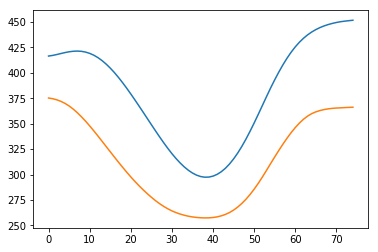

In [50]:
plt.figure()
plt.plot(knee_f)
plt.show()

In [40]:
def kalmanFilter(measurements):

	initial_state_mean = [measurements[0, 0], 0,
											measurements[0, 1], 0]

	transition_matrix = [[1, 1, 0, 0],
											[0, 1, 0, 0],
											[0, 0, 1, 1],
											[0, 0, 0, 1]]

	observation_matrix = [[1, 0, 0, 0],
											[0, 0, 1, 0]]

	kf1 = KalmanFilter(transition_matrices = transition_matrix,
									observation_matrices = observation_matrix,
									initial_state_mean = initial_state_mean)

	kf1 = kf1.em(measurements, n_iter=5)
	(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

	kf2 = KalmanFilter(transition_matrices = transition_matrix,
						observation_matrices = observation_matrix,
						initial_state_mean = initial_state_mean,
						observation_covariance = 10*kf1.observation_covariance,
						em_vars=['transition_covariance', 'initial_state_covariance'])

	kf2 = kf2.em(measurements, n_iter=5)
	(smoothed_state_means, smoothed_state_covariances)  = kf2.smooth(measurements)
	
	return smoothed_state_means[:, 0], smoothed_state_means[:, 2]

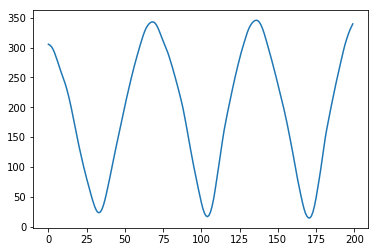

In [52]:
plt.figure()
plt.plot(teste[:, 0])
plt.show()

In [51]:
teste = np.loadtxt("Data_1_Cotovelo.txt", delimiter=',')